In [1]:
from analyze_max_od_data import plot_experimental_data
from verify_strains_iCH360 import plot_gbr
from find_glyoxylate_auxotrophs import calculate_slopes, plot_glyoxylate_auxotrophs, strain_df, carbon_source_list
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.


- Set unlimited main carbon source (succinate: `succ`, or glycerol: `glyc`), and limited glyoxylate (`glx`, 1 mmol/gCDW/h)						

| abbreviation | genotype                                  | carbon source  |
|--------------|-------------------------------------------|----------------|
| WT           | `WT*`                                     | `glx`          |
| 2OXOAUX      | `gcl aceB-glcB gltA-prpC sucAB`           | `succ+glx`     |
| C1+GLYAUX    | `gcl aceB-glcB aceA ltaE kbl-tdh glyA`    | `glyc+glx`     |
| TCAAUX       | `gcl aceA maeAB ppc`                      | `glyc+glx`     | 
| UPPAUX       | `aceB-glcB aceA eno`                      | `succ+glx`     |
| LOWAUX       | `tpi`                                     | `glyc+glx`     |
| GLYAUX       | `gcl aceB-glcB aceA ltaE kbl-tdh glyA`    | `glyc+for+glx` |

			

List of mappings from genes to reactions:

| gene        | BiGG reaction | enzyme name                                  | EC number | Present in iCH360? |
|-------------|---------------|----------------------------------------------|-----------|--------------------|
| `aceB-glcB` | `MALS`        | Malate syntase                               | 2.3.3.9   | yes                |
| `gltA-prpC` | `CS`          | Citrate synthase                             | 2.3.3.1   | yes                |
| `sucAB`     | `AKGDH`       | 2-Oxogluterate dehydrogenase                 | 1.2.4.2   | yes                |
| `gcl`       | `GLXCL`       | Glyoxalate carboligase                       | 4.1.1.47  | no                 |
| `aceA`      | `ICL`         | Isocitrate lyase                             | 4.1.3.1   | yes                |
| `maeAB`     | `ME1 & ME2`   | Malic enzyme NAD(P)                          | 1.1.1.39  | yes                |
| `ppc`       | `PPC`         | Phosphoenolpyruvate carboxylase              | 4.1.1.31  | yes                |
| `eno`       | `ENO`         | Enolase                                      | 4.2.1.11  | yes                |
| `tpiA`      | `TPI`         | Triose phosphate isomerase                   | 5.3.1.1   | yes                |
| `pck`       | `PPCK`        | Phosphoenolpyruvate carboxykinase            | 4.1.1.49  | yes                |
| `frd`       | `FRD2 & FRD3` | Fumarate reductase                           | 1.3.99.1  | yes                |
| `sdh`       | `SUCDi`       | Succinate dehydrogenase (irreversible)       | 1.3.5.1   | yes                |
| `glyA`      | `GHMT2r`      | Glycine hydroxymethyltransferase, reversible | 2.1.2.1   | Yes                |
| `kbl-tdh`   | `GLYAT`       | Glycine C-acetyltransferase                  | 2.3.1.29  | no                 |
| `ltaE`      | `THRA`        | low-specificity L-threonine aldolase         | 4.1.2.48  | no                 |


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


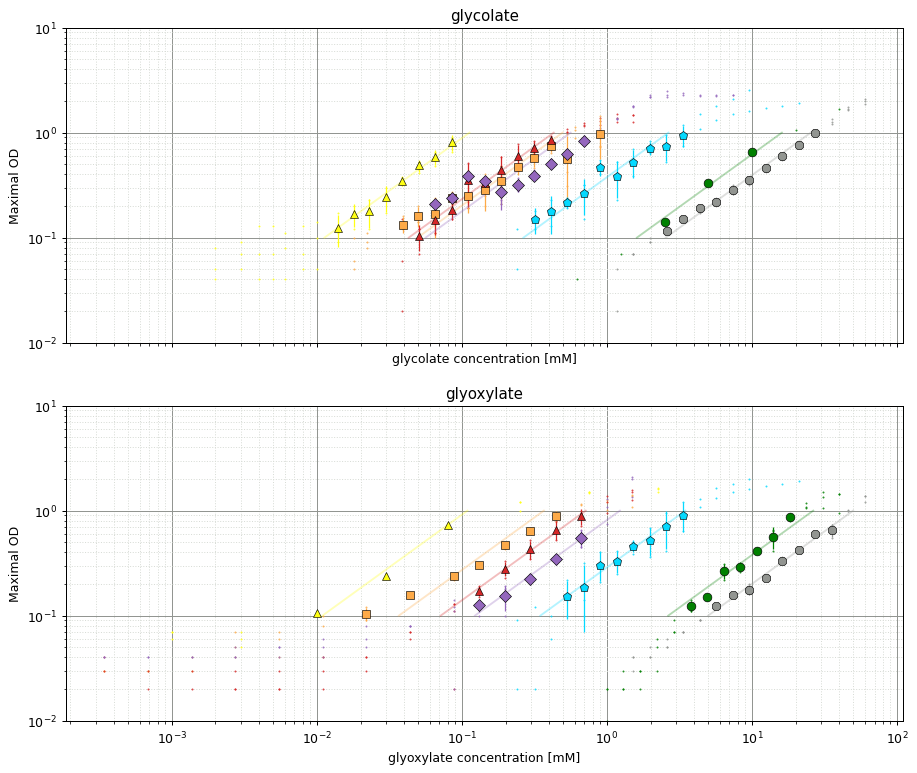

In [2]:
fig1 = plot_experimental_data()
for suffix in ["pdf", "png", "svg", "eps"]:
    fig1.savefig("res/expirmental_GBR_values." + suffix)
display(fig1)
plt.close(fig1)    

name     knock_outs carbon_sources        GBR  normed_GBR
0    2OXOAUX          (CS,)    (succ, glx)   1.070955    0.016880
1  C1+GLYAUX  (ICL, GHMT2r)    (glyc, glx)   2.228210    0.035119
2     TCAAUX     (ICL, PPC)    (glyc, glx)   2.955565    0.046583
3     UPPAUX     (ENO, ICL)    (succ, glx)   8.340975    0.131464
4     LOWAUX         (TPI,)    (glyc, glx)  27.072477    0.426694

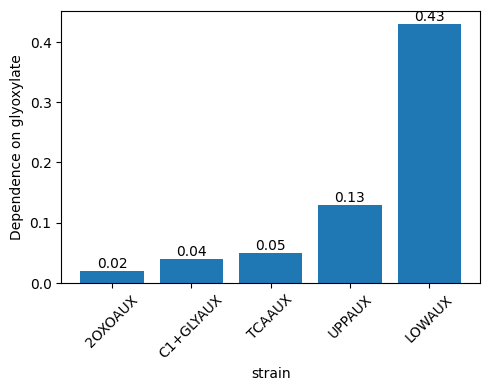

In [3]:
fig2, res_df = plot_gbr(minimal=True)
display(res_df)
res_df.to_csv("res/validate_iCH360_strains_minimal.csv")
for suffix in ["pdf", "png", "svg", "eps"]:
    fig2.savefig("res/validate_iCH360_strains_minimal." + suffix)
display(fig2)
plt.close(fig2)

name                   knock_outs    carbon_sources        GBR  \
0    2OXOAUX     (GLXCL, MALS, CS, AKGDH)       (succ, glx)   1.070955   
1  C1+GLYAUX   (GLXCL, MALS, ICL, GHMT2r)       (glyc, glx)   2.228210   
2     GLYAUX   (GLXCL, MALS, ICL, GHMT2r)  (glyc, for, glx)   1.059440   
3     TCAAUX  (GLXCL, ICL, PPC, ME1, ME2)       (glyc, glx)   2.955565   
4     UPPAUX             (MALS, ICL, ENO)       (succ, glx)   8.340975   
5     LOWAUX                       (TPI,)       (glyc, glx)  27.072477   

   normed_GBR  
0    0.016880  
1    0.035119  
2    0.016698  
3    0.046583  
4    0.131464  
5    0.426694

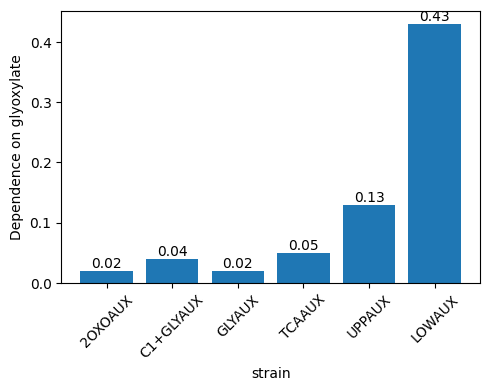

In [4]:
fig3, res_df = plot_gbr(minimal=False)
display(res_df)
res_df.to_csv("res/validate_iCH360_strains.csv")
for suffix in ["pdf", "png", "svg", "eps"]:
    fig3.savefig("res/validate_iCH360_strains." + suffix)
display(fig3)
plt.close(fig3)

Calculating slopes for up to 2 knockouts, and for 2 carbon source combinations


Carbon Sources: 100%|██████████| 2/2 [02:25<00:00, 72.83s/it]


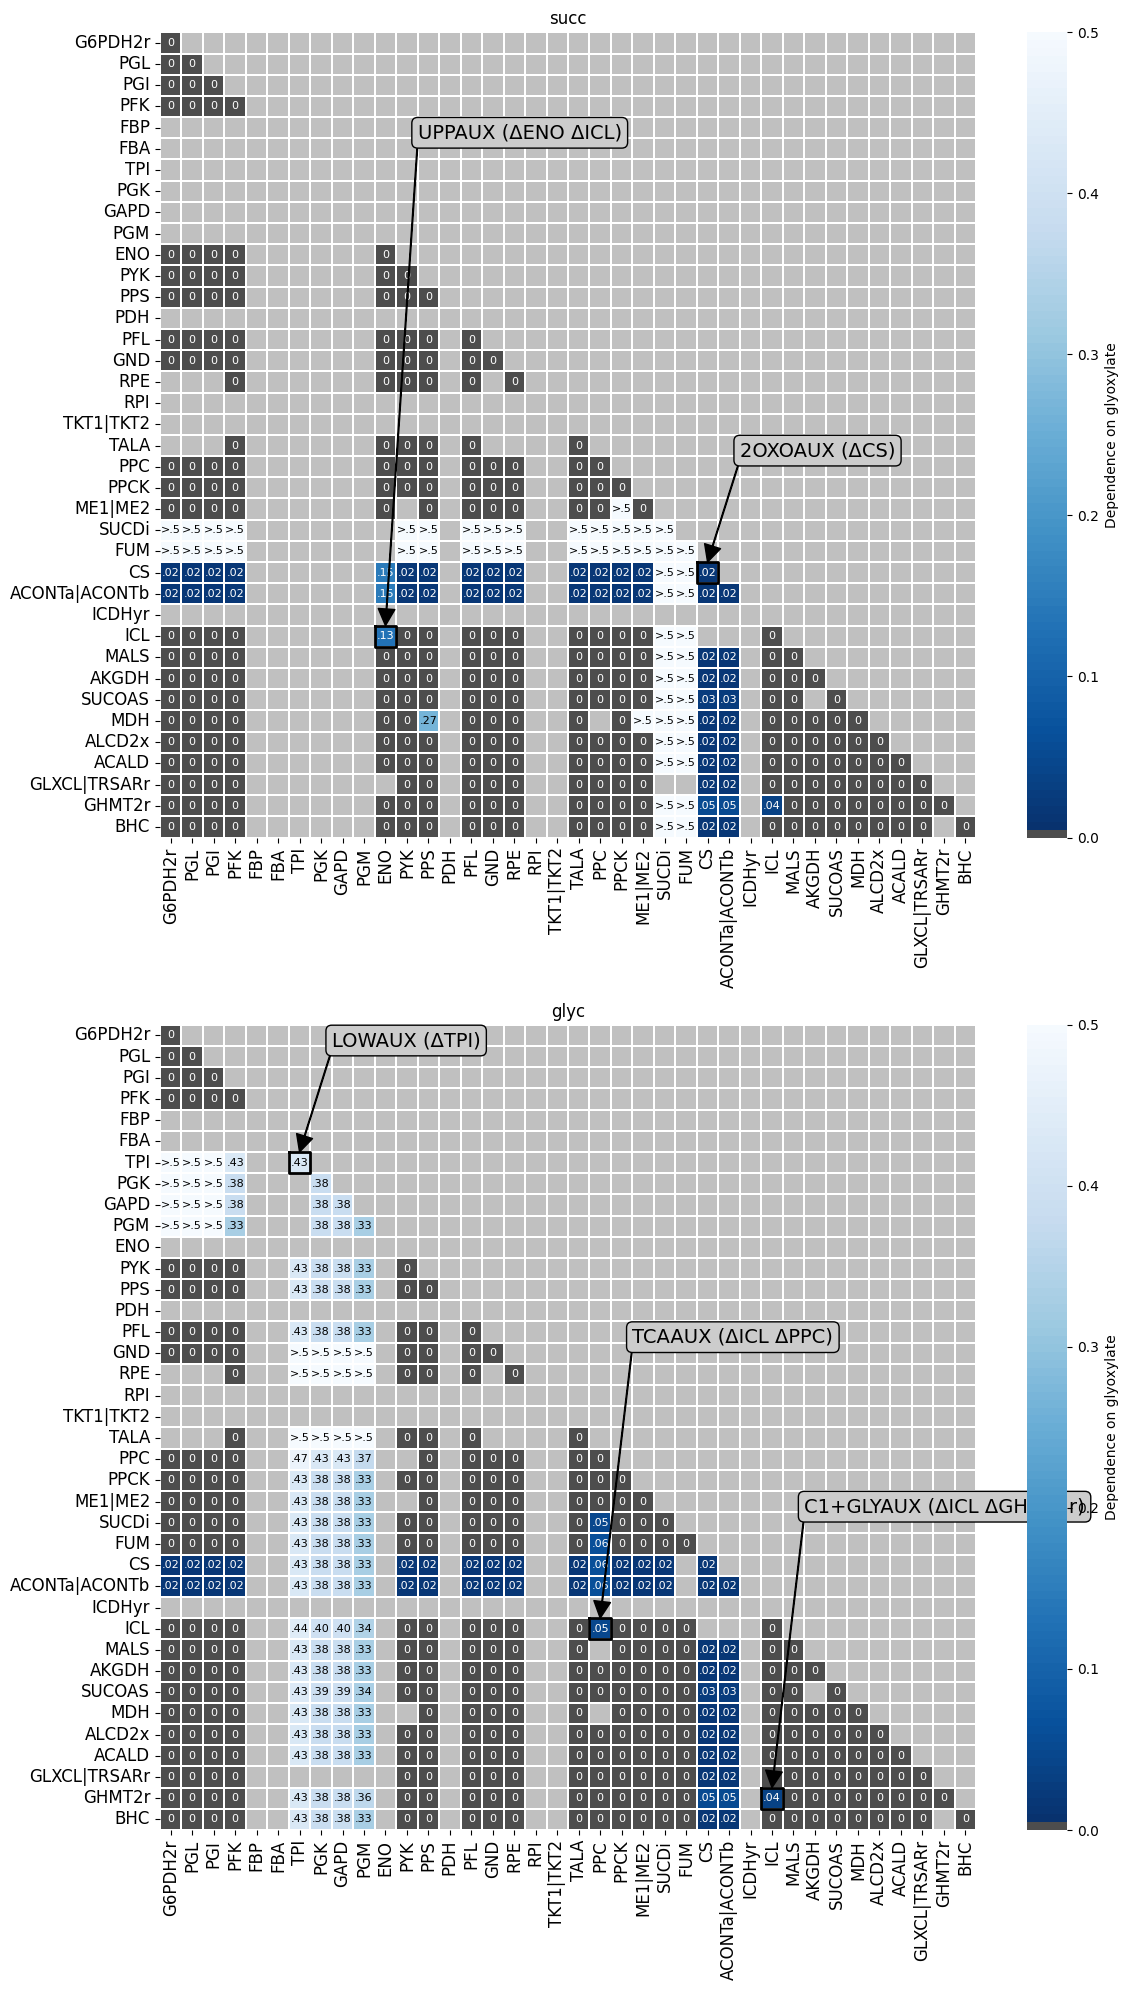

In [5]:
res_df = calculate_slopes(max_num_ko=2)
res_df.to_csv("res/auxotrophic_knockouts.csv")

fig4 = plot_glyoxylate_auxotrophs(res_df, strain_df, carbon_source_list)
fig4.tight_layout()
for suffix in ["pdf", "png", "svg", "eps"]:
    fig4.savefig("res/glyoxylate_auxotrophs." + suffix)
display(fig4)
plt.close(fig4)